In [1]:
!pip install scikit-learn
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


El objetivo del dataset es ver las estafas/fraudes de tarjetas de credito  ver las diferentes caracteristicas de las personas que fueron estafadas y las que no. Nosotros buscamos predecir TARGET(si fue o no estafada) y buscar una relacion con las diferentes columnas.

In [2]:
https://www.kaggle.com/datasets/mishra5001/credit-card

credit_ds = pd.read_csv("application_data.csv")

credit_ds

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Limpio el dataset para que no haya filas con valores null

In [3]:
#Me fijo cuantas veces aparece el 1 y el 0 en la columna TARGET
print(credit_ds['TARGET'].value_counts())

#Elimino valores null
credit_ds_clean = credit_ds.dropna()

#creo dos sub-datasets, uno para donde TARGET es 0 y otro para cuando es 1
class_0 = credit_ds_clean[credit_ds_clean['TARGET'] == 0]
class_1 = credit_ds_clean[credit_ds_clean['TARGET'] == 1]
print(class_0.shape[0], class_1.shape[0])

#Me fijo cuantas filas tiene 
cant_1 = class_1.shape[0]


# Agarro misma cantidad de 1 y 0 para que el nuevo dataset este balanceado
class_0_sample = class_0.sample(n=cant_1, random_state=42)  
class_1_sample = class_1.sample(n=cant_1, random_state=42) 

# Combino ambos sub-datasets en uno nuevo y los mezclo 
balanced_ds = pd.concat([class_0_sample, class_1_sample])
balanced_ds = balanced_ds.sample(frac=1, random_state=42).reset_index(drop=True)

# Me fijo nuevamente cuantas muestras hay de 1 y 0 en TARGET para ver si se filtro bien
print(balanced_ds['TARGET'].value_counts())

TARGET
0    282686
1     24825
Name: count, dtype: int64
8076 526
TARGET
0    526
1    526
Name: count, dtype: int64


Exploracion del dataset

In [4]:
credit_ds.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

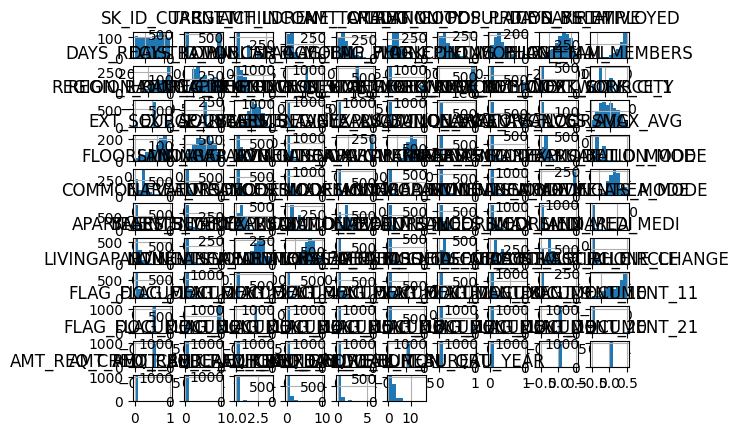

In [5]:
balanced_ds.hist()
plt.show()

#no se ve muy bien

In [ ]:
# Filtro mi dataset para quedarme solo con los datos que son numericos

numeric_credit_ds = balanced_ds.select_dtypes(include='number')

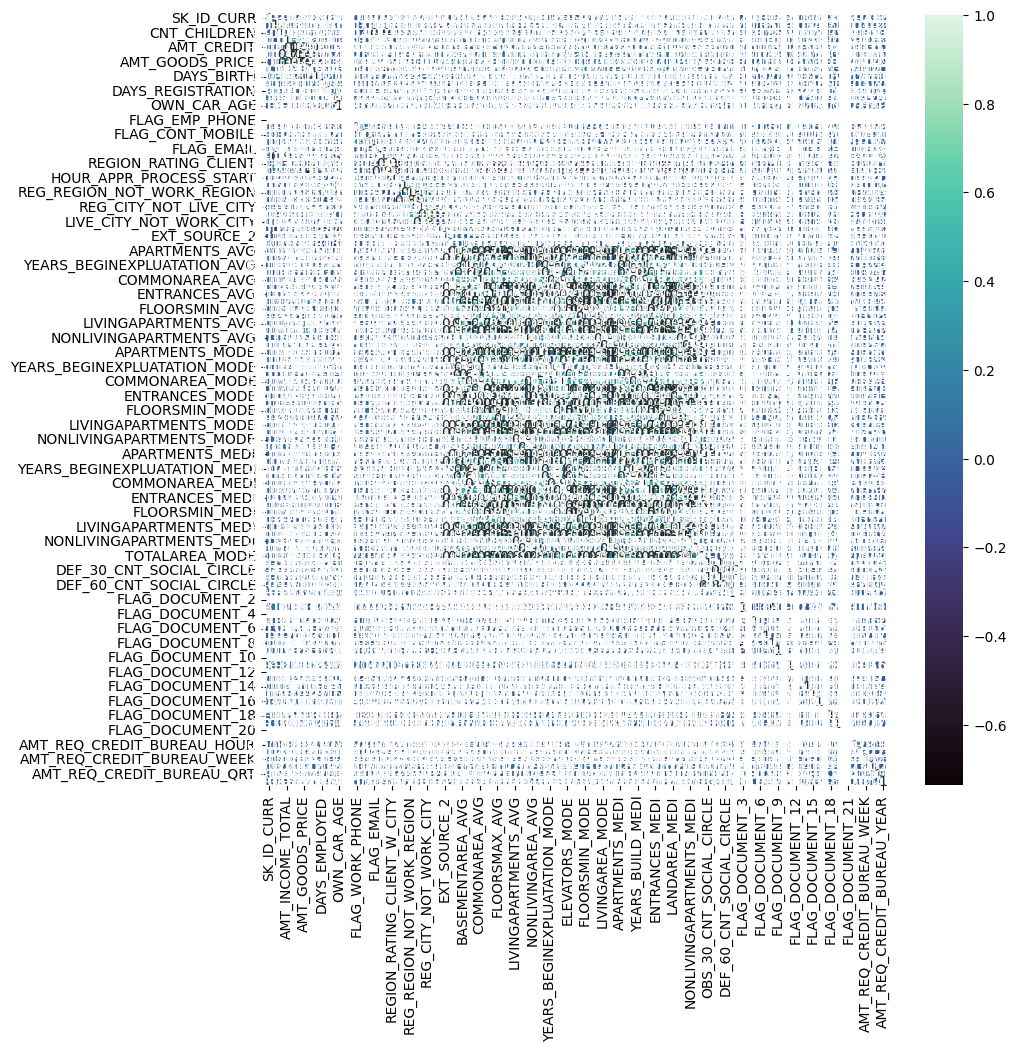

In [7]:
#Hago un mapa de calor para (intentar) ver las relaciones
 
cm = numeric_credit_ds.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako", annot=True)
plt.show()

Regresion logistica sin atributos categoricos

In [8]:
#Divido el dataset numerico en X (valores CON LOS QUE predecir) e Y (valor A predecir)

from sklearn.model_selection import train_test_split

X_df = numeric_credit_ds.drop(columns=['TARGET']) 

y_df = numeric_credit_ds[['TARGET']]

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42
)

In [11]:
from sklearn.linear_model import LogisticRegression

#Creo el modelo de regresion logica

RL_num = LogisticRegression()
RL_num.fit(X_train, y_train)
y_pred = RL_num.predict(X_test)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Calculo el error cuadratico

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

0.4549763033175355

In [12]:
#Calculo el coeficiente

print("Coefficients:", RL_num.coef_)
print("Intercept:", RL_num.intercept_)

Coefficients: [[ 1.23554793e-06 -4.55411050e-08 -2.76754106e-06  1.90909140e-06
   2.65952840e-05 -2.43674491e-06 -1.62326064e-10  7.37191426e-06
   1.80144789e-04 -3.59519115e-05  2.64683608e-05  7.76360524e-07
   9.71961455e-09  9.71961455e-09  3.93285940e-08  9.87941622e-09
   1.96953304e-08  2.46499187e-08 -6.78689719e-08  1.03060283e-07
   9.82895320e-08 -4.31571777e-08  3.73425986e-09  5.12359716e-09
   1.12194729e-08  4.79438524e-09  1.26993387e-08  6.98981314e-09
  -6.32355990e-08 -5.21104816e-08 -7.77010314e-08 -6.44824473e-09
  -4.91382394e-09  8.68442018e-09 -4.20980978e-09 -3.53393859e-10
  -4.59706111e-09 -8.35722411e-10 -1.15539326e-08 -7.33459424e-09
   5.91935557e-09 -6.52723371e-09 -6.52051186e-09  3.01670238e-09
  -5.23377589e-10 -4.85983130e-09 -3.31374583e-09  8.75377850e-09
  -3.40894573e-09  3.50495377e-10 -3.12319980e-09  2.99412036e-10
  -1.16142108e-08 -6.17254028e-09  6.16646922e-09 -6.56678615e-09
  -5.32815860e-09  3.05587460e-09  1.12782797e-09 -5.84724779e

In [14]:
#Calculo precision

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5450236966824644


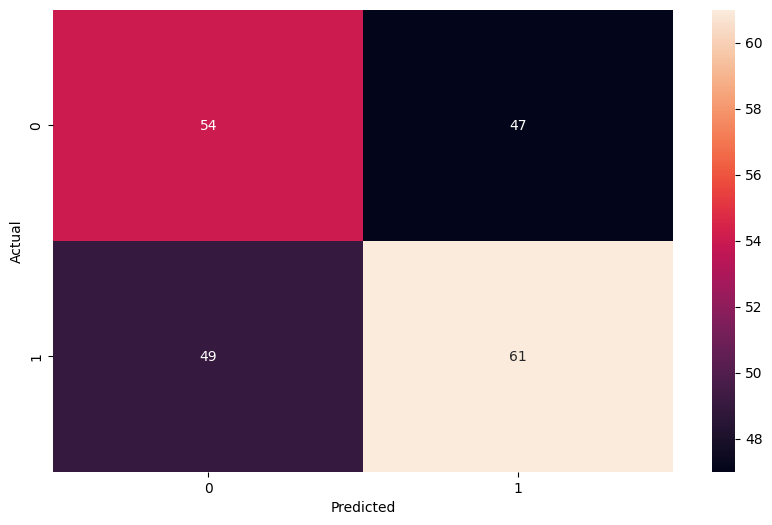

In [15]:
#Veo los True Positive, False Positive, True Negative, False Negative

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")